# Interpretive Tag Statistics for Katherine Mansfield's "The Garden Party"

First, let's get all the necessary programming libraries, that will allow us to do these computations. 

In [355]:
from bs4 import BeautifulSoup  # For processing XMLfrom BeautifulSoup
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from math import floor
matplotlib.style.use('ggplot')

Next, let's read the XML file of the short story.

In [380]:
doc = open('garden-party.xml').read()
soup = BeautifulSoup(doc, 'lxml')

Read all the critical remarks.

In [381]:
interps = soup.findAll('interp')

These functions will extract the tags from the critical remarks. 

In [382]:
def getTags(interp): 
    descs = interp.findAll('desc')
    descList = []
    for desc in descs: 
        descList.append(desc.string)
    return descList

def getAllTags(interps):
    allTags = []
    for interp in interps: 
        tags = getTags(interp)
        for tag in tags: 
            allTags.append(tag)
    return allTags

Create a de-duplicated list of tags represented. 

In [383]:
def dedupe(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
allTags = dedupe(getAllTags(interps))
print(str(allTags))

['interruptions', 'medias-res', 'perfection', 'wind', 'colors', 'light', 'flora', 'impressions', 'green', 'coming-of-age', 'carnival', 'inversions', 'orientalism', 'butterflies', 'food', 'desire', 'class', 'sexuality', 'eyes', 'reminders', 'onomatopoeia', 'fingers', 'envelope', 'sounds', 'absurdity', 'play', 'silver-gold', 'flora ', 'servants', 'death', 'mourning', 'sound', 'music', 'dreams', 'ambiguity', 'animals', 'dividers', 'birds', 'black', 'time', 'darkness', 'oil']


Create a table of all the tags, and where they occur according to lexia.

In [384]:
tagDict = {}
for interp in interps: 
    number = int(interp.attrs['n'])
    tags = getTags(interp)
    tagDict[number] = tags

Create a function for checking whether a tag is associated with a certain lexia.

In [385]:
def checkTags(tag):
    hasTags = []
    for n in tagDict: 
        if tag in tagDict[n]: 
            hasTags.append(1)
        else: 
            hasTags.append(0)
    return hasTags

Assemble a matrix of all tags, and whether they occur in certain lexia. Turn this into a data frame.

In [386]:
hasTagMatrix = {}
for tag in allTags: 
    hasTagMatrix[tag] = checkTags(tag)
df = pd.DataFrame(hasTagMatrix)

In [387]:
df.head()

,absurdity,ambiguity,animals,birds,black,butterflies,carnival,class,colors,coming-of-age,...,perfection,play,reminders,servants,sexuality,silver-gold,sound,sounds,time,wind
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


While we're at it, let's find the most frequent tags.

In [388]:
s = df.sum(axis='rows').sort_values(ascending=False)
mostFrequentTags = s[s>3]
mostFrequentTags

class            16
death            14
colors           13
flora            13
interruptions    12
food              9
green             7
eyes              6
light             6
servants          5
desire            5
darkness          5
envelope          4
butterflies       4
sexuality         4
dtype: int64

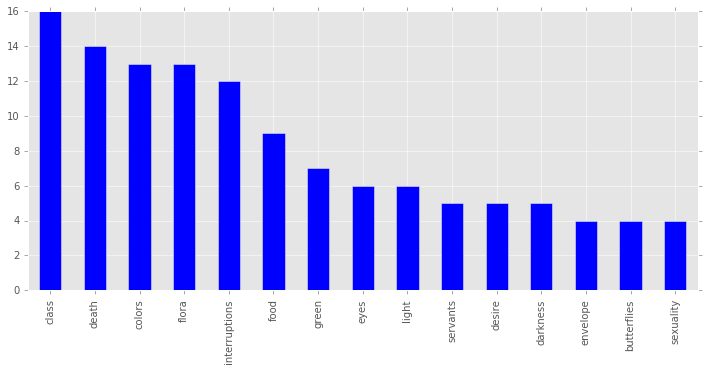

In [389]:
mostFrequentTags.plot(kind='bar', figsize=(12,5))

Group lexia by 10s, so the data are more meaningful than ones and zeroes.

In [390]:
def chunkdf(df, chunksize=10): 
    groups = df.groupby(lambda x: floor(x/chunkSize)).sum()
    return groups
groups = chunkdf(df)

Generate a line plot of all the tags and their occurences in 10-lexia blocks.

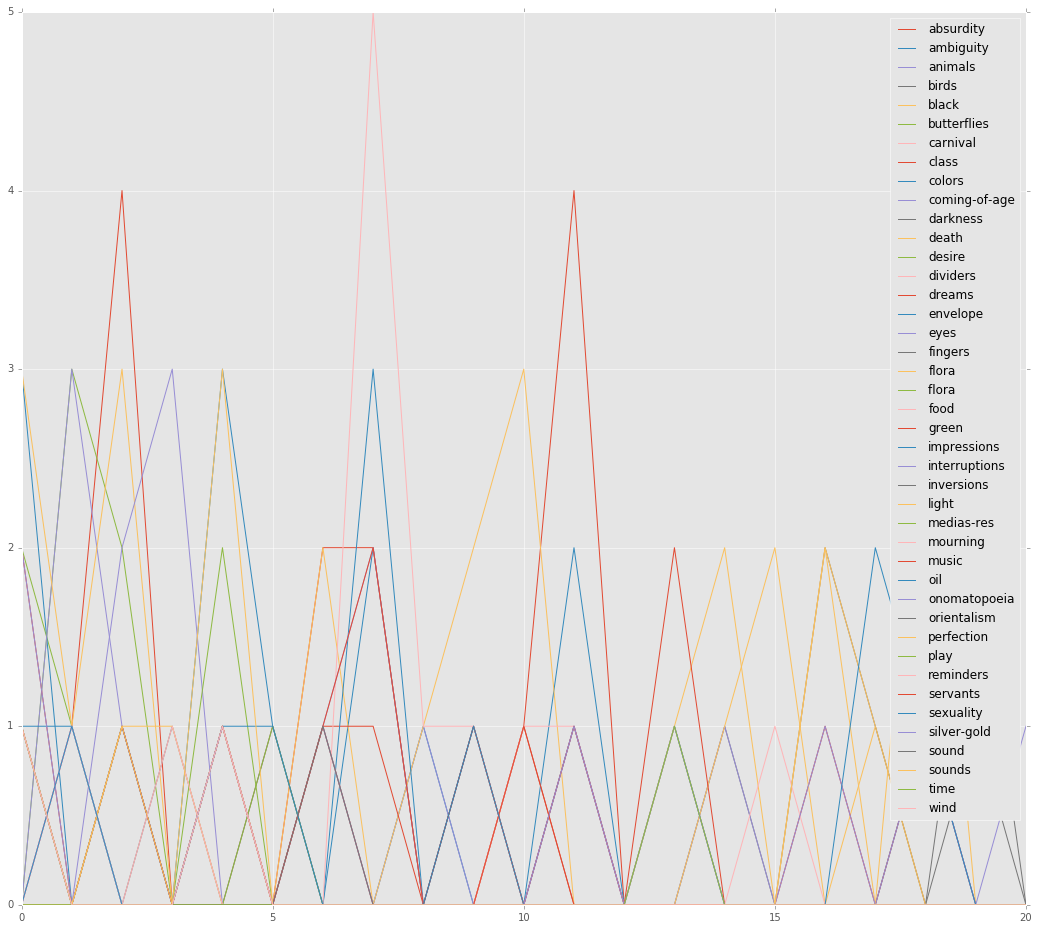

In [391]:
groups.plot(figsize=(18,16))

Since that chart is hard to read, let's examine subplots instead. Where do references to flora occur in the story (as interpreted by critics)? Do these co-occur with references to sexuality?

In [392]:
def plotTags(tags, thisdf=groups): 
    thisdf[tags].plot(kind='area', alpha=0.5, figsize=(10,5))

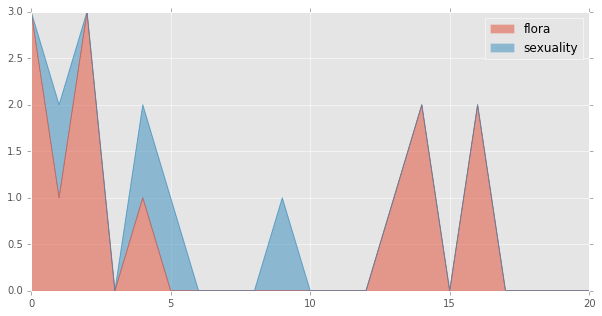

In [393]:
plotTags(['flora', 'sexuality'])

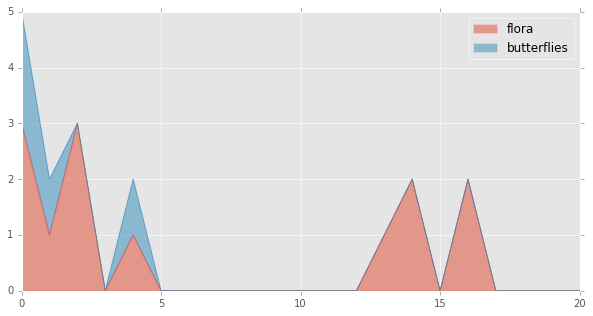

In [394]:
plotTags(['flora', 'butterflies'])

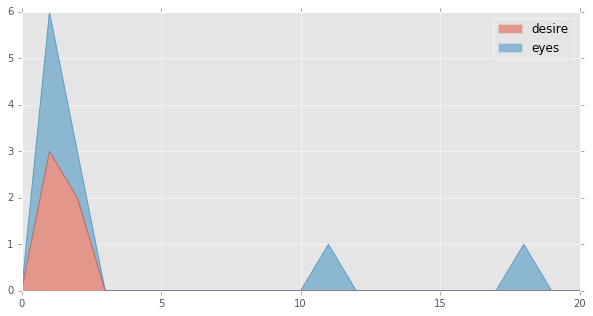

In [395]:
plotTags(['desire', 'eyes'])

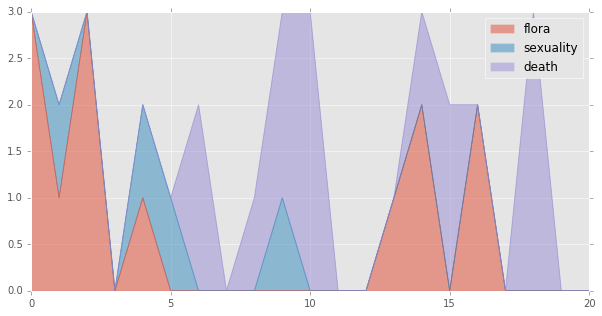

In [396]:
plotTags(['flora', 'sexuality', 'death'])

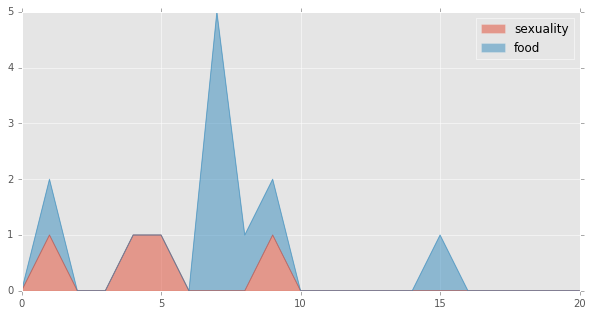

In [397]:
plotTags(['sexuality', 'food'])

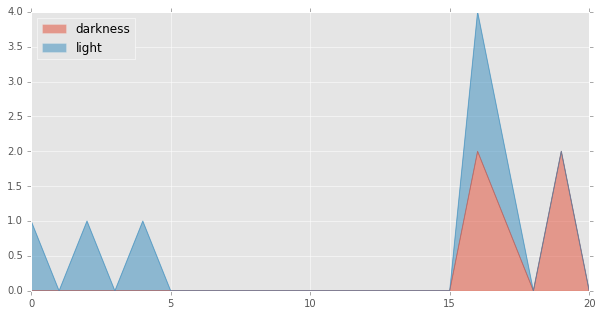

In [398]:
plotTags(['darkness', 'light'])

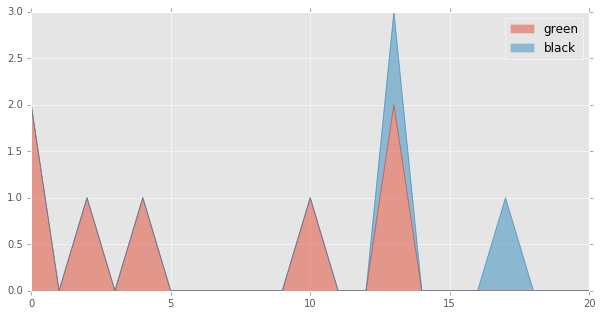

In [399]:
plotTags(['green', 'black'])